In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import coreset, qaoa

np.random.seed()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_vectors = np.load('Datasets/pulsar_data_vectors.npy')

filtered_data_vectors = []
num_zero = np.inf; num_one = np.inf
for v in data_vectors:
    if v[-1] == 0 and num_zero > 0:
        filtered_data_vectors.append(v[:-1])
        num_zero -= 1
    elif num_one > 0:
        filtered_data_vectors.append(v[:-1])
        num_one -= 1

data_vectors = filtered_data_vectors
data_vectors = data_vectors - np.mean(data_vectors, axis=0)
np.random.shuffle(data_vectors)

In [7]:
B = coreset.get_bestB(data_vectors, num_runs=10, k=4)

cost_whole = coreset.kmeans_cost(data_vectors, coreset_vectors=data_vectors)
print('cost_whole is %s' % cost_whole)

# random sampling "coreset":
random_sample_5_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=5)] for _ in range(10)]
random_sample_10_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=10)] for _ in range(10)]
random_sample_20_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=20)] for _ in range(10)]
random_sample_40_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=40)] for _ in range(10)]
cost_5_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_5_list[i]) for i in range(10)]
cost_10_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_10_list[i]) for i in range(10)]
cost_20_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_20_list[i]) for i in range(10)]
cost_40_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_random_list is %s, %s, %s, %s' % (
    np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list)))

# actual coreset:
coreset_vectors_5_list, coreset_weights_5_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_5_list[i], coreset_weights_5_list[i] = coreset.BFL16(data_vectors, B=B, m=5)

coreset_vectors_10_list, coreset_weights_10_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_10_list[i], coreset_weights_10_list[i] = coreset.BFL16(data_vectors, B=B, m=10)
    
coreset_vectors_20_list, coreset_weights_20_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_20_list[i], coreset_weights_20_list[i] = coreset.BFL16(data_vectors, B=B, m=20)

coreset_vectors_40_list, coreset_weights_40_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_40_list[i], coreset_weights_40_list[i] = coreset.BFL16(data_vectors, B=B, m=40)

cost_5_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_5_list[i], sample_weight=coreset_weights_5_list[i]) for i in range(10)]
cost_10_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_10_list[i], sample_weight=coreset_weights_10_list[i]) for i in range(10)]
cost_20_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_20_list[i], sample_weight=coreset_weights_20_list[i]) for i in range(10)]
cost_40_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_40_list[i], sample_weight=coreset_weights_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_coreset_list is %s, %s, %s, %s' % (
    np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list)))

best_index = cost_5_coreset_list.index(np.min(cost_5_coreset_list))
best_coreset_vectors = coreset_vectors_5_list[best_index]
best_coreset_weights = coreset_weights_5_list[best_index]
print('\nzeroth order for m=5 coreset:')
qaoa_bound_zero_5 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

best_index = cost_10_coreset_list.index(np.min(cost_10_coreset_list))
best_coreset_vectors = coreset_vectors_10_list[best_index]
best_coreset_weights = coreset_weights_10_list[best_index]

print('\nzeroth order for m=10 coreset:')
qaoa_bound_zero_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

print('\nfirst order for m=10 coreset:')
qaoa_bound_first_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=1)

print('\nsecond order for m=10 coreset:')
qaoa_bound_second_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=2)

print('\ninfinite order for m=10 coreset:')
qaoa_bound_inf_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order='inf')

cost_whole is 122774649.73572466
min cost_{5, 10, 20, 40}_random_list is 132263597.7498039, 123117450.60521181, 125376895.43205066, 124303019.98901428
min cost_{5, 10, 20, 40}_coreset_list is 126212993.88192461, 134414235.7776931, 124699241.3211674, 123496870.16423295

zeroth order for m=5 coreset:
194063650.44752595 (-1, 1, -1, 1, 1) 4.155651712431086 375047224779.3181
126212993.8819246 (1, -1, -1, 1, 1) 3.318832247891592 3351959768857.669

zeroth order for m=10 coreset:
288454612.196926 (1, -1, 1, -1, -1, 1, -1, -1, 1, -1) 0.39760088770134 54707357075.06544
156641755.72310784 (1, -1, 1, 1, 1, 1, -1, -1, -1, 1) 0.7443179251524712 1015707487657.7961
180112044.68355355 (-1, -1, -1, -1, -1, 1, -1, 1, 1, -1) 0.46712016117518984 455342672676.1043
141892141.14988595 (-1, -1, -1, 1, -1, 1, 1, -1, 1, -1) 1.5550810836080962 1714286637883.5957
138643100.86497453 (1, 1, 1, 1, 1, 1, -1, -1, -1, 1) 0.9730779878919763 1425915847894.8184
132552356.50698107 (-1, -1, -1, -1, -1, 1, 1, -1, 1, -1) 1.429

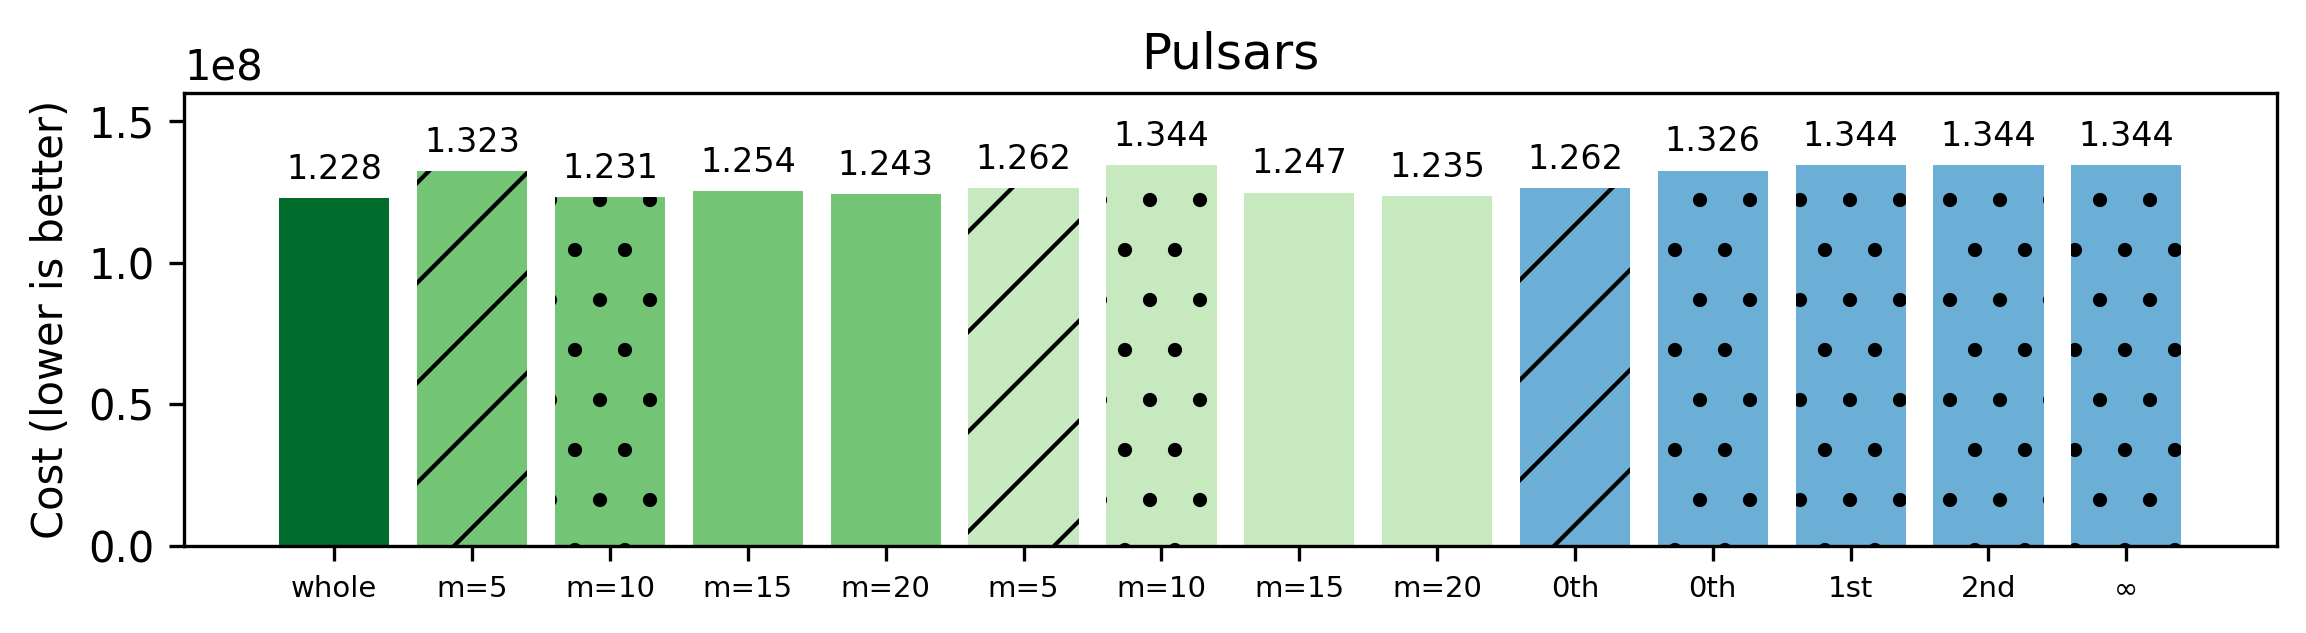

In [8]:
x = np.arange(14)
costs = [cost_whole, np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list),
         np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list),
         qaoa_bound_zero_5, qaoa_bound_zero_10, qaoa_bound_first_10, qaoa_bound_second_10, qaoa_bound_inf_10]
scale = np.floor(np.log10(max(costs)))

labels = ['whole', 'm=5', 'm=10', 'm=15', 'm=20', 'm=5', 'm=10', 'm=15', 'm=20', '0th', '0th', '1st', '2nd', u"\u221E"]
color = ['#006d2c', '#74c476', '#74c476', '#74c476', '#74c476', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']
hatch=['', '/', '.', '', '', '/', '.', '', '', '/', '.', '.', '.', '.']
# plt.bar(x, costs, yerr=yerr, color=color, hatch=hatch)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height() / (10 ** scale)
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height * (10 ** scale)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


fig, ax = plt.subplots(figsize=(9, 2), dpi=300)
for i in range(len(x)):
    rects = ax.bar(x[i], costs[i], label=labels[i], color=color[i], hatch=hatch[i]) # , yerr=[[yerr[0][i]], [yerr[1][i]]])
    autolabel(rects)

ax.set_ylim([0,1.6e8])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=7)
ax.set_ylabel('Cost (lower is better)')
ax.set_title('Pulsars')

plt.savefig('../Electronics_Submission/pulsar.pdf')

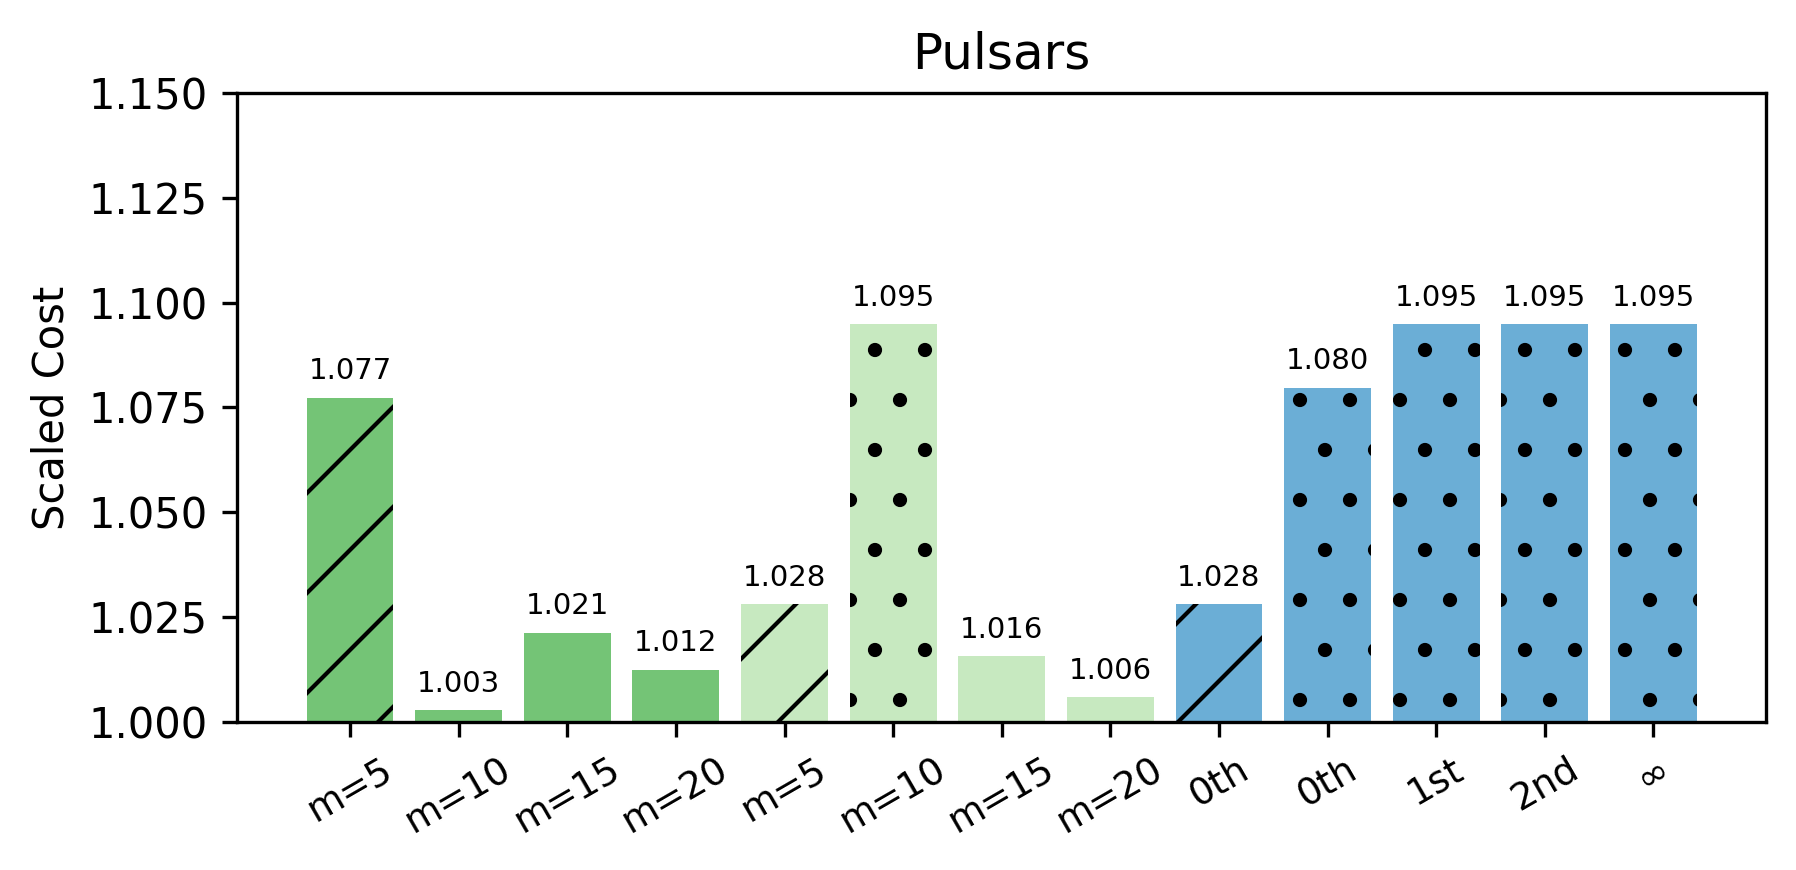

In [10]:
x = np.arange(13)
costs = [np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list),
         np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list),
         qaoa_bound_zero_5, qaoa_bound_zero_10, qaoa_bound_first_10, qaoa_bound_second_10, qaoa_bound_inf_10]
scaled_costs = [c / cost_whole for c in costs]
#scale = np.floor(np.log10(max(costs)))

labels = ['m=5', 'm=10', 'm=15', 'm=20', 'm=5', 'm=10', 'm=15', 'm=20', '0th', '0th', '1st', '2nd', u"\u221E"]
color = ['#74c476', '#74c476', '#74c476', '#74c476', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']
hatch=['/', '.', '', '', '/', '.', '', '', '/', '.', '.', '.', '.']
# plt.bar(x, costs, yerr=yerr, color=color, hatch=hatch)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()# / (10 ** scale)
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),# * (10 ** scale)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=7)


fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
for i in range(len(x)):
    rects = ax.bar(x[i], scaled_costs[i], label=labels[i], color=color[i], hatch=hatch[i]) # , yerr=[[yerr[0][i]], [yerr[1][i]]])
    autolabel(rects)

ax.set_ylim([1,1.15])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=9, rotation=30)
ax.set_ylabel('Scaled Cost')
ax.set_title('Pulsars')
plt.tight_layout()
plt.savefig('../Electronics_Submission/scaled_pulsar.pdf')

In [8]:
data_vectors = np.load('Datasets/pulsar_data_vectors.npy')
print('num of pulsars', np.sum(data_vectors[:,-1]))
print('num of data vectors', len(data_vectors))

num of pulsars 1639.0
num of data vectors 17898


In [9]:
best_index = cost_5_coreset_list.index(np.min(cost_5_coreset_list))
np.save('pulsar_coreset_vectors.npy', coreset_vectors_5_list[best_index])
np.save('pulsar_coreset_weights.npy', coreset_weights_5_list[best_index])

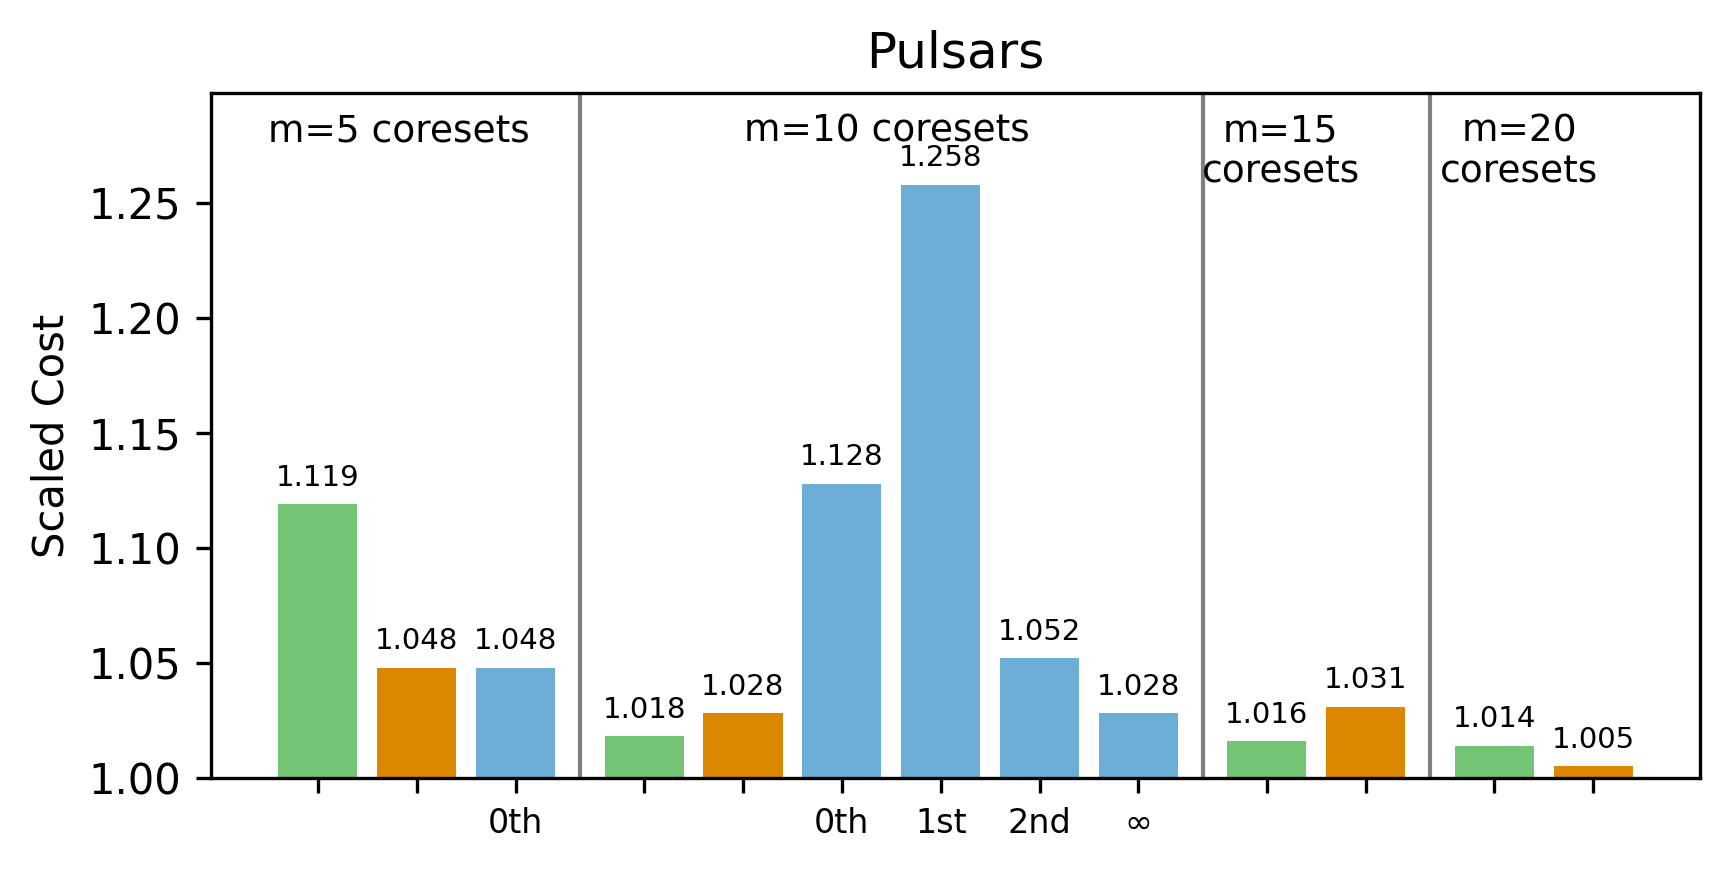

In [19]:
x = np.arange(13)
sc = [1.119, 1.018, 1.016, 1.014,
      1.048, 1.028, 1.031, 1.005,
      1.048, 1.128, 1.258, 1.052, 1.028]
#scale = np.floor(np.log10(max(costs)))

#hatch=['/', '.', '', '', '/', '.', '', '', '/', '.', '.', '.', '.']
# plt.bar(x, costs, yerr=yerr, color=color, hatch=hatch)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()# / (10 ** scale)
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),# * (10 ** scale)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=7)
        
grouped_costs = [sc[0], sc[4], sc[8],
                 sc[1], sc[5], *sc[9:],
                 sc[2], sc[6],
                 sc[3], sc[7]]

color = ['#74c476', '#db8700', '#6baed6',
         '#74c476', '#db8700', '#6baed6', '#6baed6', '#6baed6', '#6baed6',
         '#74c476', '#db8700',
         '#74c476', '#db8700']

labels = ['', '', '0th',
          '', '', '0th', '1st', '2nd', u"\u221E",
          '', '',
          '', '']

x = [val + 0.3 if i > 2 else val for i, val in enumerate(x)]
x = [val + 0.3 if i > 8 else val for i, val in enumerate(x)]
x = [val + 0.3 if i > 10 else val for i, val in enumerate(x)]

fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
for i in range(len(x)):
    rects = ax.bar(x[i], grouped_costs[i], label=labels[i], color=color[i])
    autolabel(rects)
    
vertlines = [(x[2]+x[3])/2, (x[8]+x[9])/2, (x[10]+x[11])/2]
for vl in vertlines:
    ax.axvline(vl, c='grey', lw=1)
    
ax.annotate('m=5 coresets',
            xy=(.155, .87), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=9)

ax.annotate('m=10 coresets',
            xy=(.43, .87), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=9)

ax.annotate('m=15\ncoresets',
            xy=(.74, .87), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=9)

ax.annotate('m=20\ncoresets',
            xy=(.878, .87), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=9)

ax.set_ylim([1,1.298])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=8, rotation=0)
ax.set_ylabel('Scaled Cost')
ax.set_title('Pulsars')
plt.tight_layout()
plt.savefig('../Electronics_Submission/reformat_pulsar.pdf')